In [1]:
from tkinter import *
import os,numpy as np
from ResultAnalyser import ResultsComparison
from collections import Counter

In [2]:
def showResults():
    idx = [(v.get()==1) for v in var]
    selected = list(np.array(log_names)[idx])
    
    idx_dann = [(s.split(' ')[0] in list(np.array(label_text)[idx])) for s in log_names_dann ]
    selected_dann = list(np.array(log_names_dann)[idx_dann])
    print("selected ", selected)
    print("dann  ", selected_dann)
    if(len(selected)>0):
        if(len(selected_dann)>0):
            res = ResultsComparison(selected, selected_dann)
        else:
            res = ResultsComparison(selected)
        res.show()
    else:
         print("None selected ")   
def refreshList(var,labels,checkbuttons):
    log_names = os.listdir(log_dir)
    log_names_dann = os.listdir(log_dir_dann)
    label_text_dann = [x.split(' ')[0] for x in os.listdir(log_dir)]
    label_text = [x.split(' ')[0] for x in os.listdir(log_dir)]
    colors = color_similarity(label_text)
    var.clear()
    labels.clear()
    checkbuttons.clear()
    for i,text in enumerate(label_text):
        var1 = IntVar()
        lb = Label(window,text=text,bg=colors[i],font =('Verdana', 15),width=40).grid(column=1,row=i)
        lbt = Checkbutton(window, bg="white",variable=var1).grid(column=0,row=i)
        labels.append(lb)
        checkbuttons.append(lbt)
        var.append(var1)
        del lb,lbt,var1
def color_similarity(label_text):
    labs = [x.split('_')[0]+'_'+x.split('_')[1] if(len(x.split('_'))>1) else x for x in label_text ]
    col = list(np.arange(255,155,-100//len(Counter(labs))))
    label_color = np.array(['#%02x%02x%02x' % (255,255,255)]*len(labs))
    for k,c in zip(list(Counter(labs).keys()),col):
        idx = [l==k for l in labs]
        label_color[idx] = '#%02x%02x%02x' % (c, c, c)
    return list(label_color)

['abcdefgh_i 2019-09-26 20:22:15.860182', 'abcdefgh_i_tune_0.3 Tuned 30 2019-09-26 14:24:11.245075', 'abcdefi_gh 2019-09-27 15:52:55.801787', 'abcdefi_gh_tune_0.3 Tuned 30 2019-09-27 21:24:38.153651', 'abcdef_gh 2019-09-29 01:13:33.343637', 'abcdef_gh_tune_0.3 Tuned 30 2019-09-29 01:13:07.482459', 'abcdef_gh_tune_0.3 Tuned 30 2019-09-29 10:31:11.451096', 'abdfi_c 2019-09-24 12:51:14.116640', 'abdf_c 2019-09-23 13:38:14.925635', 'abdf_c_tune_0.3 Tuned 30 2019-09-25 18:23:15.679809', 'bcdefgh_a_tune_0.3 Tuned 30 2019-09-29 01:13:59.192682', 'bcdfghi_a 2019-09-24 22:26:47.695625', 'bcdfghi_a_tune_0.3 Tuned 30 2019-09-25 11:46:30.180240', 'bcdfi_a 2019-09-24 18:10:56.540917', 'bcdf_a 2019-09-24 17:02:30.673090', 'dann']
['abcdefi_gh_tune_0.3 Tuned 30 2019-09-28 15:55:32.304667']
selected  ['abcdefi_gh 2019-09-27 15:52:55.801787', 'abcdefi_gh_tune_0.3 Tuned 30 2019-09-27 21:24:38.153651']
dann   ['abcdefi_gh_tune_0.3 Tuned 30 2019-09-28 15:55:32.304667']
[0 1 2 3 4]
abcdefi_gh
abcdefi_gh_tu

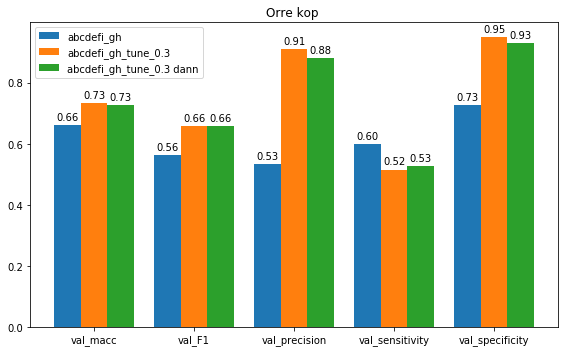

selected  ['abcdefgh_i 2019-09-26 20:22:15.860182', 'abcdefgh_i_tune_0.3 Tuned 30 2019-09-26 14:24:11.245075']
dann   []
[0 1 2 3 4]
abcdefgh_i
abcdefgh_i_tune_0.3


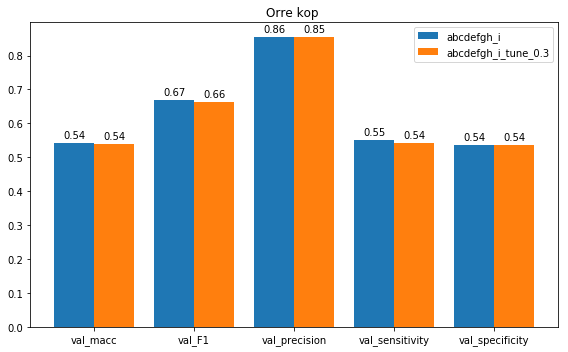

In [3]:
log_dir = '../../Adversarial Heart Sound Results/logs/'
log_dir_dann = log_dir+'dann/'

window = Tk()
window.configure(background='black')
window.title("Welcome to LikeGeeks app")
window.minsize(300, 300) 

log_names = os.listdir(log_dir)
log_names_dann = os.listdir(log_dir_dann)

print(log_names)
print(log_names_dann)


label_text = [x.split(' ')[0] for x in os.listdir(log_dir)]

var = []
labels = []
checkbuttons = []
refreshList(var,labels,checkbuttons)
button = Button(window, text='Show Result Comparison ', fg='white',bg='grey',
                font=('Verdana',15), command=showResults)
refreshButton = Button(window, text='Refresh', fg='white',bg='grey',
                font=('Verdana',12), command=lambda:refreshList(var,labels,checkbuttons))
button.grid(column=1)
refreshButton.grid(column=1)
window.mainloop()


In [82]:
labs = [x.split('_')[0]+'_'+x.split('_')[1] if(len(x.split('_'))>1) else x for x in label_text ]
print(labs)
col = list(np.arange(255,155,-100//len(Counter(labs))))
label_color = np.array(['#%02x%02x%02x' % (255,255,255)]*len(labs))
for k,c in zip(list(Counter(labs).keys()),col):
    idx = [l==k for l in labs]
    label_color[idx] = '#%02x%02x%02x' % (c, c, c)

['abcdefgh_i', 'abcdefgh_i', 'abcdefi_gh', 'abcdefi_gh', 'abdfi_c', 'abdf_c', 'abdf_c', 'bcdfghi_a', 'bcdfghi_a', 'bcdfi_a', 'bcdf_a', 'dann']


In [87]:
color_similarity(label_text)

['#ffffff',
 '#ffffff',
 '#f2f2f2',
 '#f2f2f2',
 '#e5e5e5',
 '#d8d8d8',
 '#d8d8d8',
 '#cbcbcb',
 '#cbcbcb',
 '#bebebe',
 '#b1b1b1',
 '#a4a4a4']

In [71]:
idx = [l=='abcdefgh_i' for l in labs]

In [79]:
label_color = np.array(['#%02x%02x%02x' % (255,255,255)]*len(labs))
label_color[idx] = '#%02x%02x%02x' % (0,0,0)

In [78]:
label_color

array(['#000000', '#000000', '#ffffff', '#ffffff', '#ffffff', '#ffffff',
       '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff'],
      dtype='<U7')

In [32]:
idx = [(v.get()==1) for v in var]
idx

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

3
[0 1 2 3 4]
[-1.  0.  1.]
abcdefgh_i
abcdefgh_i_tune_0.3
abcdefi_gh


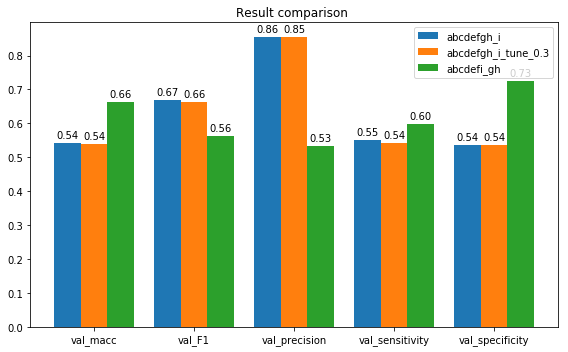

In [33]:
a = ResultsComparison([x for x in os.listdir(log_dir)][:3])
len(a.data)
a.show()

In [1]:
import sys
from PyQt5.QtWidgets import (QFileDialog, QAbstractItemView, QListView,
                             QTreeView, QApplication, QDialog)

class getExistingDirectories(QFileDialog):
    def __init__(self, *args):
        super(getExistingDirectories, self).__init__(*args)
        self.setOption(self.DontUseNativeDialog, True)
        self.setFileMode(self.Directory)
        self.setOption(self.ShowDirsOnly, True)
        self.findChildren(QListView)[0].setSelectionMode(QAbstractItemView.ExtendedSelection)
        self.findChildren(QTreeView)[0].setSelectionMode(QAbstractItemView.ExtendedSelection)

In [5]:
#qapp = QApplication(sys.argv)
dlg = getExistingDirectories()
if dlg.exec_() == QDialog.Accepted:
    print(dlg.selectedFiles())

In [3]:
wo = dlg.selectedFiles()

In [4]:
len(wo)

1

In [21]:
import sys
if sys.version_info[0] == 2:
    from Tkinter import *
else:
    from tkinter import *
from TkinterDnD2 import *

dirs = []

def drop(event):
    entry_sv.set(event.data)
def drop2(event):
    entry_sv.set(event.data)
    dirs.append(event.data)


root = TkinterDnD.Tk()
entry_sv = StringVar()
entry_sv.set('Drop Here...')
entry = Entry(root, textvar=entry_sv, width=80)
entry.pack(fill=X, padx=10, pady=10)
entry.drop_target_register(DND_FILES)
root.drop_target_register(DND_ALL)

entry.dnd_bind('<<Drop>>', func = drop)
root.dnd_bind('<<Drop>>',drop2)

root.mainloop()

In [1]:
def showResults2():
    
    print("selected ", dirs)
    if(len(dirs)>0):
        res = ResultsComparison(dirs)
        res.show()
    else:
         print("None selected ")  
def newEntry(event):
    s = (event.data)
    dirs.append(s[1:-1])
    updateTextList(s[1:-1])
def updateTextList(x):
    model = x[x.index('logs')+len('logs/'):].split('/')[0]
    dann = 'dann' if 'dann' in x else  'No_dann'
    log = x.split('/')[-1]
    [tr,test]=log.split(' ')[0].split('_')
    x = model.ljust(15)+dann.ljust(10)+'Train - '+tr.ljust(len('abcdefghi  '))+'Tester - '+test

    tex.insert(END, x + '\n')
def refreshList():
    dirs.clear()
    tex.delete('1.0', END)

In [2]:
import sys
if sys.version_info[0] == 2:
    from Tkinter import *
else:
    from tkinter import *
from TkinterDnD2 import *
from tkinter import *
import os,numpy as np
from ResultAnalyser import ResultsComparison
from collections import Counter

window = TkinterDnD.Tk()
window.configure(background='black')
window.title("Welcome to LikeGeeks app")
window.minsize(500, 500) 
global dirs
dirs = []

window.drop_target_register(DND_ALL)
window.dnd_bind('<<Drop>>',func = newEntry)



button = Button(window, text='Show Result Comparison ', fg='white',bg='grey',
                font=('Verdana',15), command=showResults2)
refreshButton = Button(window, text='Refresh', fg='white',bg='grey',
                font=('Verdana',12),command=refreshList)

button.grid(row=1,column=0)
refreshButton.grid(row=2,column = 0)
global tex
tex = Text(window)
tex.config(font=('Arial', 12))
tex.grid(row=3)

window.mainloop()


In [13]:
dirs[0]

'/media/mhealthra2/Data/heart_sound/Adversarial Heart Sound Results/logs/SmallNet/dann/abcdfghi_e zeropad 1 0 200 2019-12-06 22:07:48.444353'

In [19]:
help(window.dnd_bind(func))

Help on method dnd_bind in module TkinterDnD2.TkinterDnD:

dnd_bind(sequence=None, func=None, add=None) method of TkinterDnD2.TkinterDnD.Tk instance
    Bind to this widget at drag and drop event SEQUENCE a call
    to function FUNC.
    SEQUENCE may be one of the following:
    <<DropEnter>>, <<DropPosition>>, <<DropLeave>>, <<Drop>>,
    <<Drop:type>>, <<DragInitCmd>>, <<DragEndCmd>> .
    The callbacks for the <Drop*>> events, with the exception of
    <<DropLeave>>, should always return an action (i.e. one of COPY,
    MOVE, LINK, ASK or PRIVATE).
    The callback for the <<DragInitCmd>> event must return a tuple
    containing three elements: the drop action(s) supported by the
    drag source, the format type(s) that the data can be dropped as and
    finally the data that shall be dropped. Each of these three elements
    may be a tuple of strings or a single string.

